In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# **Arbol de Decision**

In [ ]:
# Cargar los datos
iris = datasets.load_iris()#dataset externo WARNING
X = iris.data
y = iris.target
# ajustar arbol de decisión simple con hiperparametros (defecto)

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#test depende del tamaño del dataset en general, semilla de donde arranca

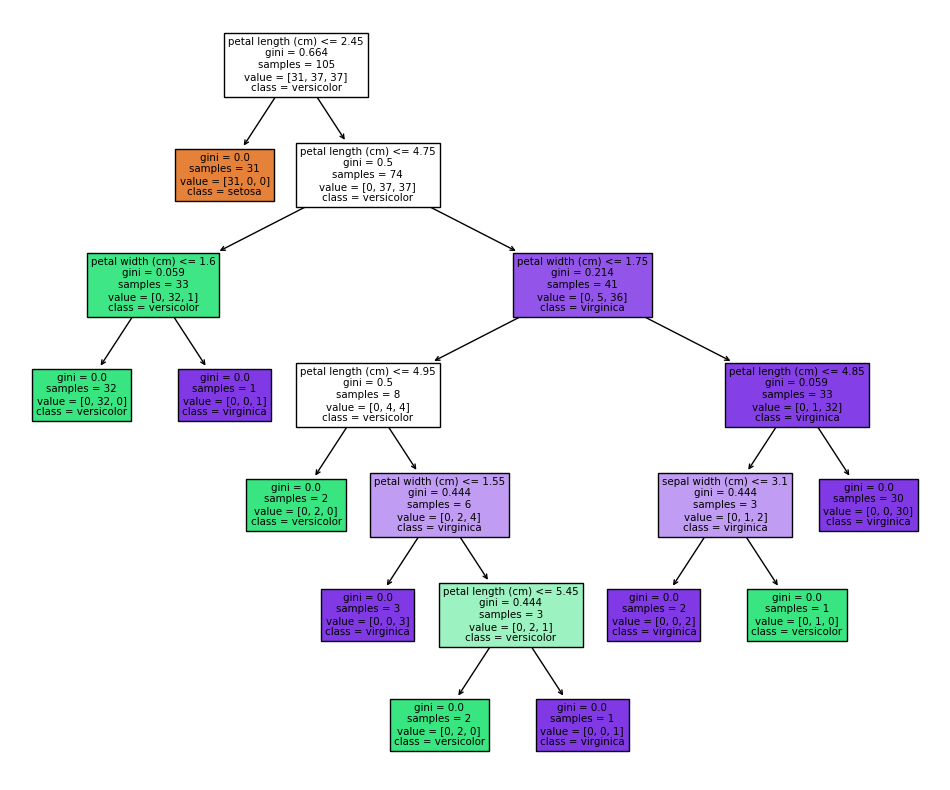

In [ ]:
#Aplicacion del algoritmo de desición
clf = DecisionTreeClassifier(random_state=42)#varia
model = clf.fit(X_train, y_train)


# Graficando
fig = plt.figure(figsize=(12,10))
_ = tree.plot_tree(clf,feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, pred)#comparo son los datos de y test contra los predichos #score
accuracy

1.0

# **KNN**

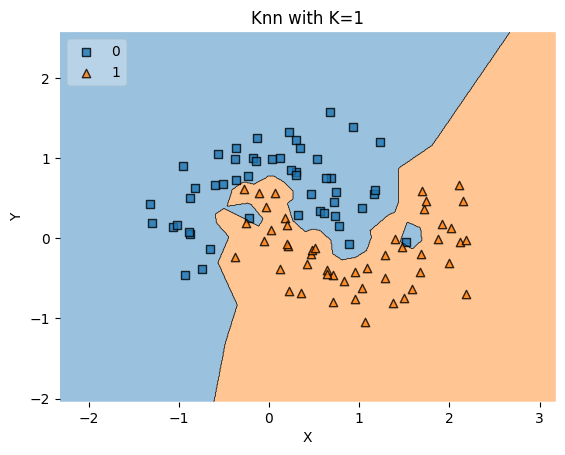

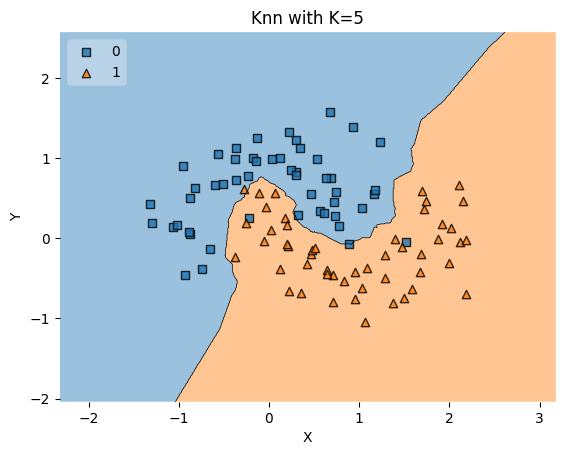

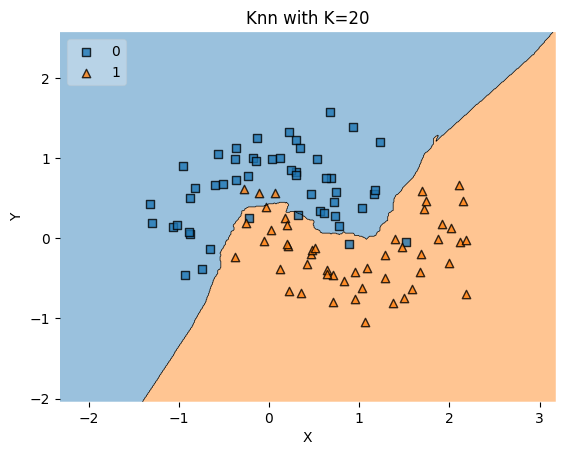

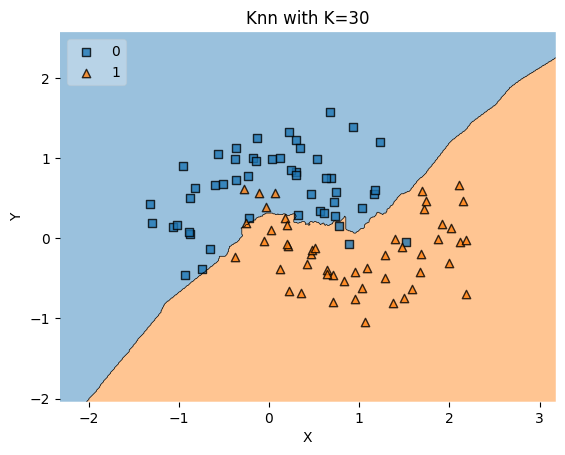

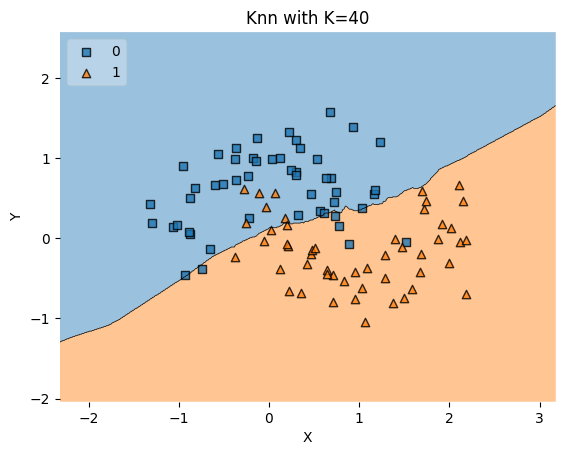

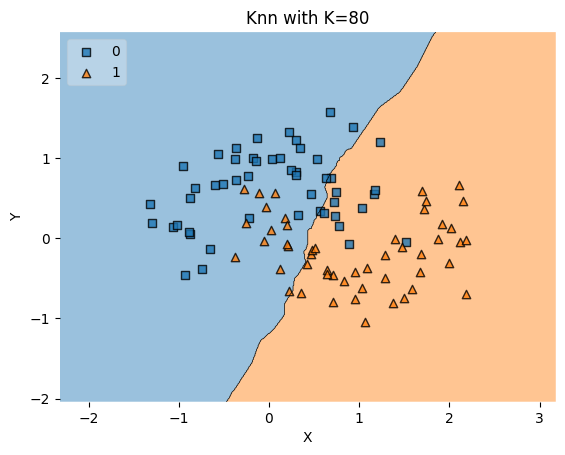

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

def knn_comparison(data, k): # funcion de comparacion
  x = data[['X','Y']].values # Extraccion de columns---las variables indep-var depe la que quiero predecir    x=data[['col1', 'col2','col3']]

  y = data['class'].astype(int).values # Clase y como int y=['target']<-- 'mm'
  clf = neighbors.KNeighborsClassifier(n_neighbors=k) #algoritmo
  clf.fit(x, y)# Graficar la region de decision
  plot_decision_regions(x, y, clf=clf, legend=2)# Añadir anotaciones
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Knn with K='+ str(k))
  plt.show()

# Cargar y aplicar funcion
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/ushape.csv'
data1 = pd.read_csv(url,sep=',')
data1.head()

for i in [1,5,20,30,40,80]: # Para diferentes valores de k (Knn)
    knn_comparison(data1, i)

##**Data Concentrica**

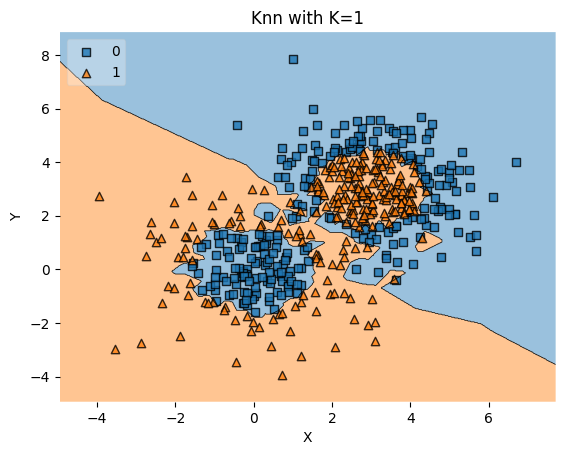

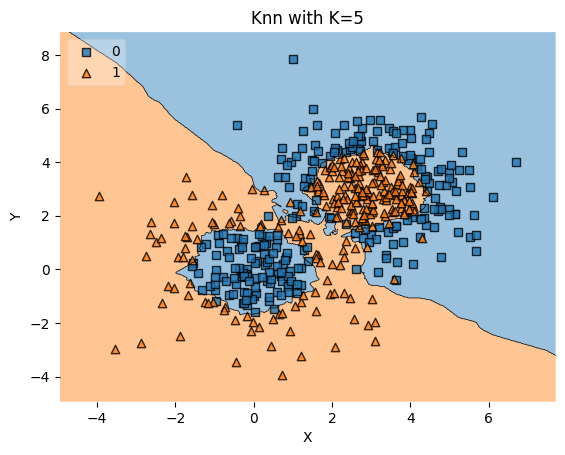

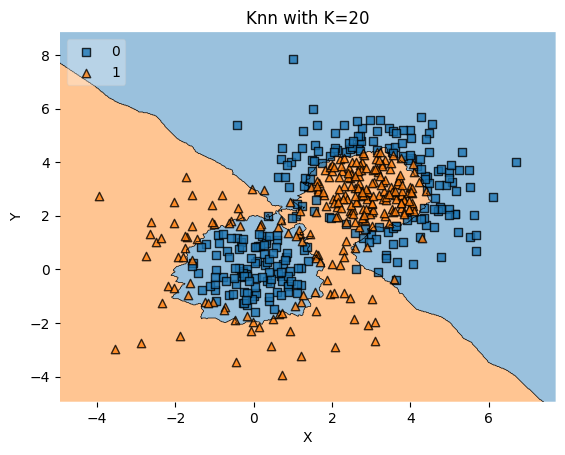

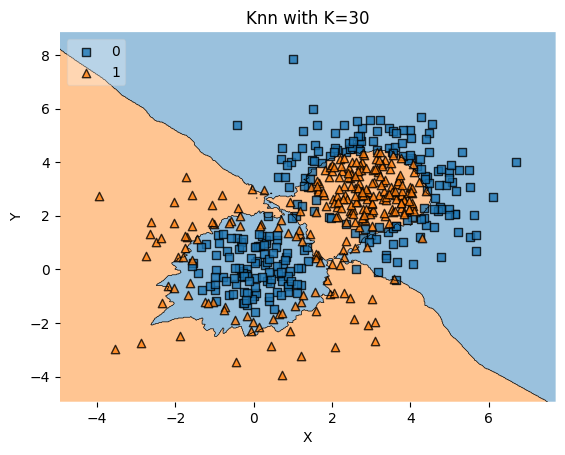

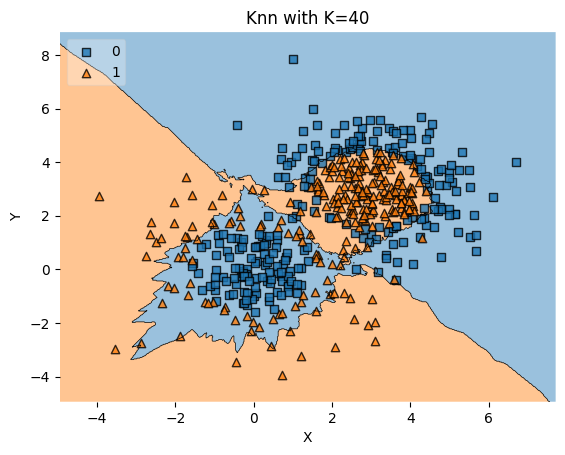

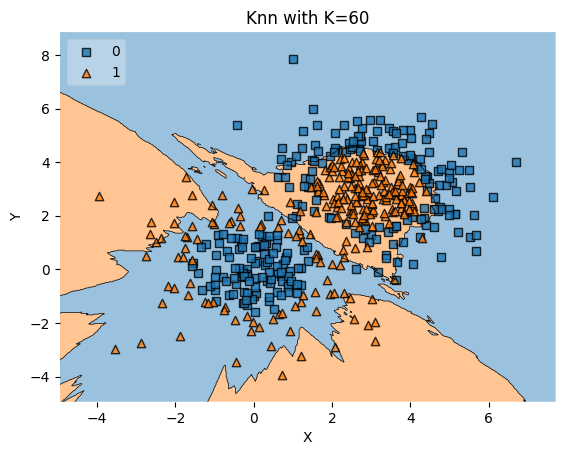

In [ ]:
# Data concentrica
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/concertriccir2.csv'
data2 = pd.read_csv(url,sep=',')
data2.head()


for i in [1,5,20,30,40,60]:
    knn_comparison(data2, i)

## **Data XOR**

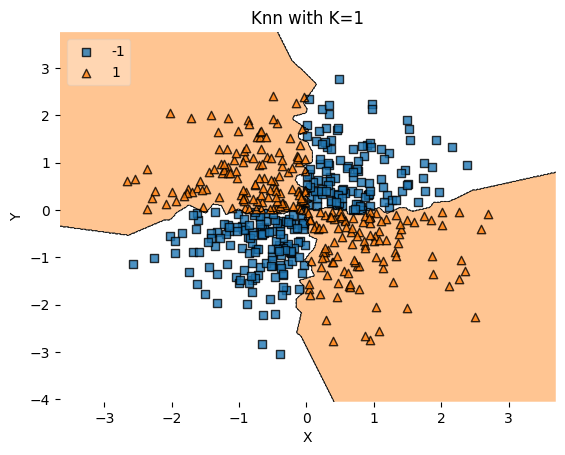

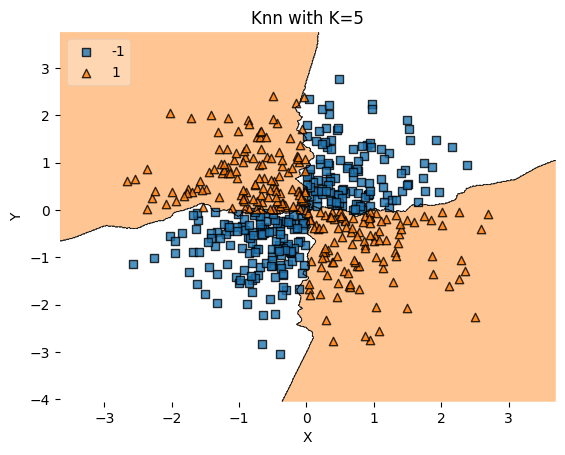

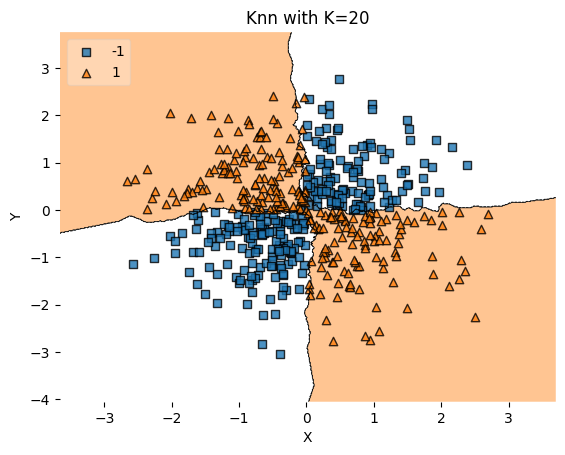

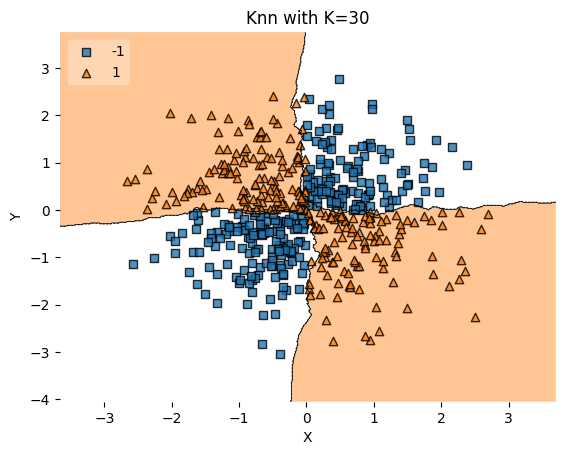

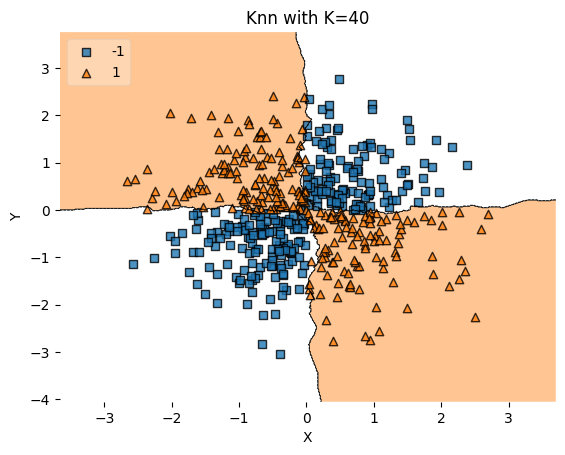

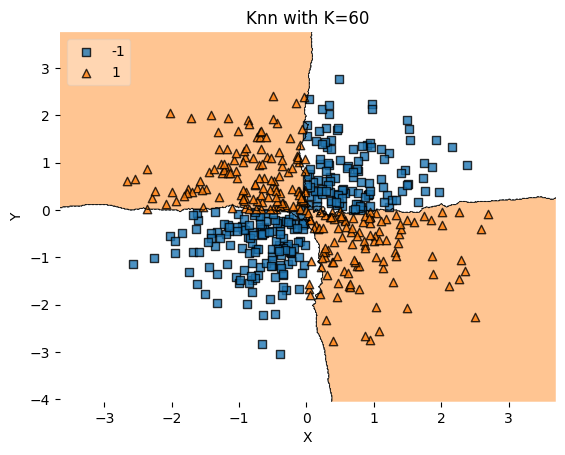

In [ ]:
# Data XOR
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/xor.csv'
data3 = pd.read_csv(url,sep=',')
data3.head()

for i in [1,5,20,30,40,60]:
   knn_comparison(data3, i)

## **Data Lineal Separable**

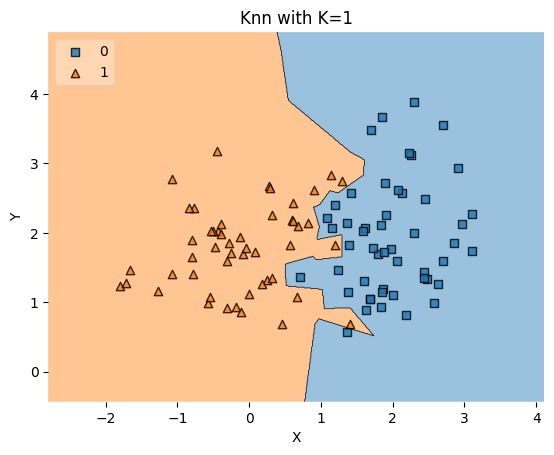

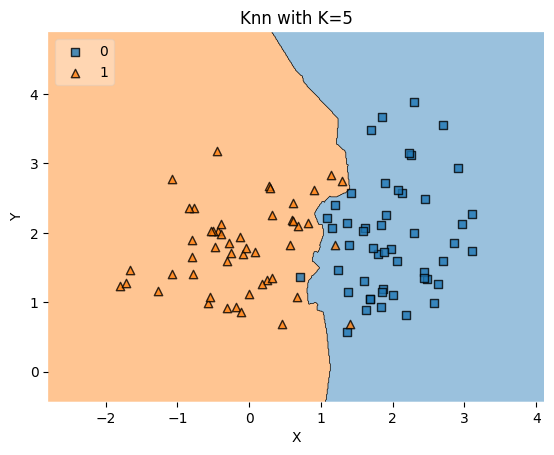

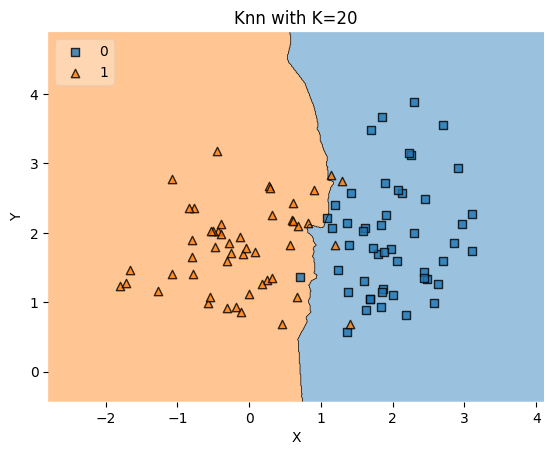

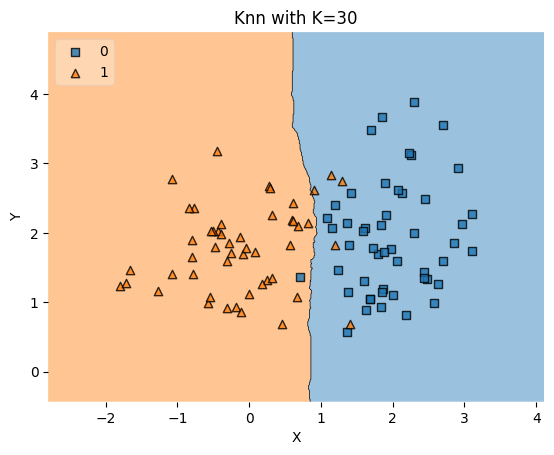

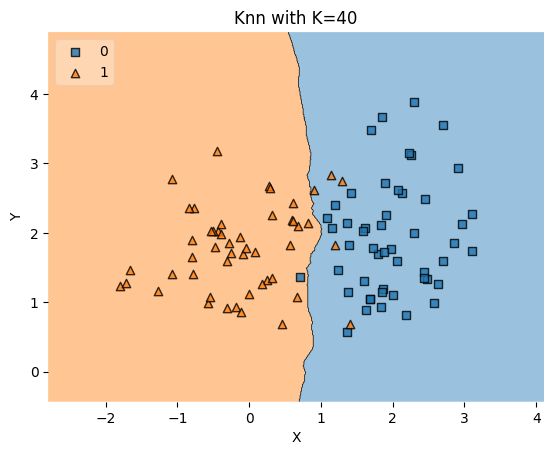

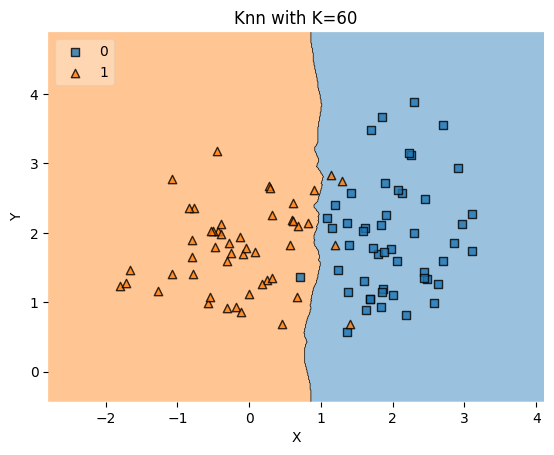

In [ ]:
# Data Lineal Separable
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/linearsep.csv'
data4 = pd.read_csv(url,sep=',')
data4.head()


for i in [1,5,20,30,40,60]:

    knn_comparison(data4, i)

##**Data con Outliers**

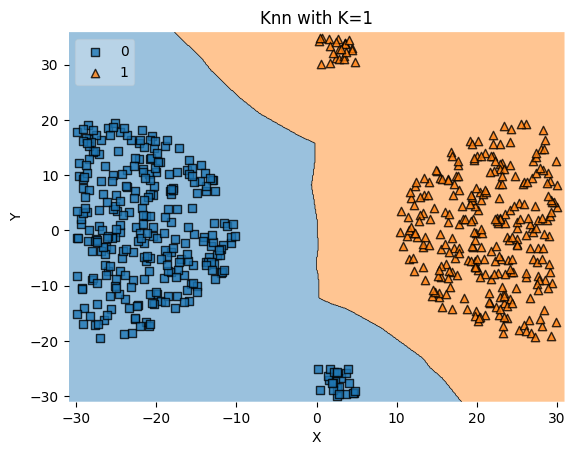

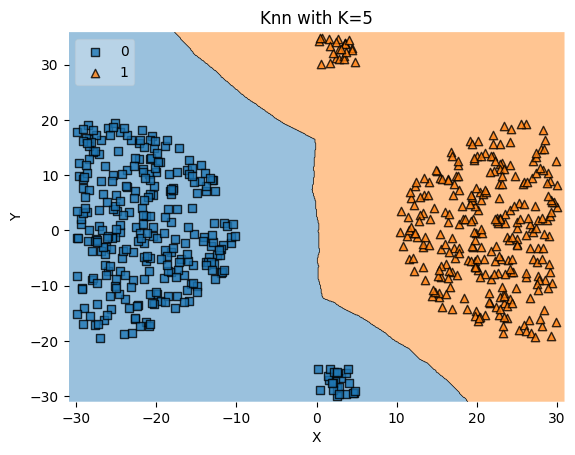

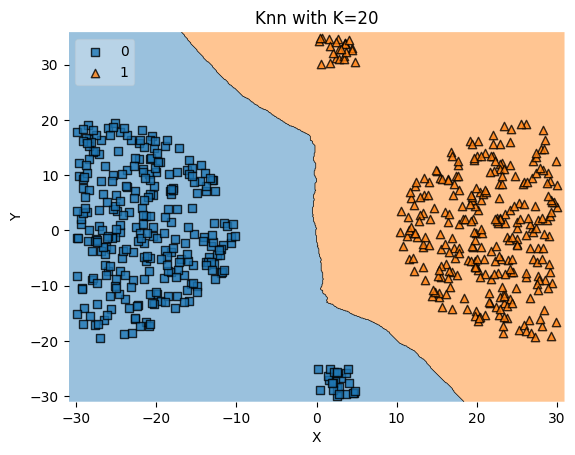

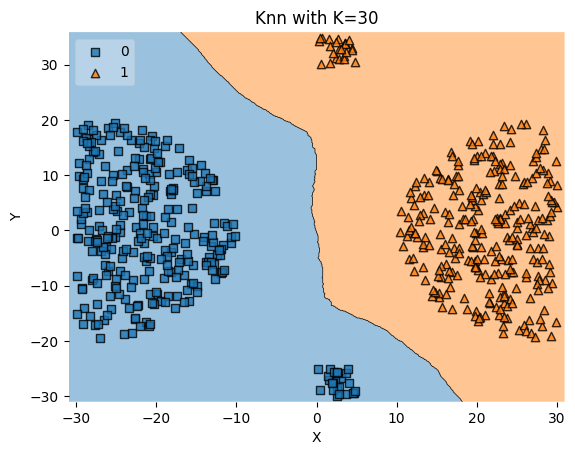

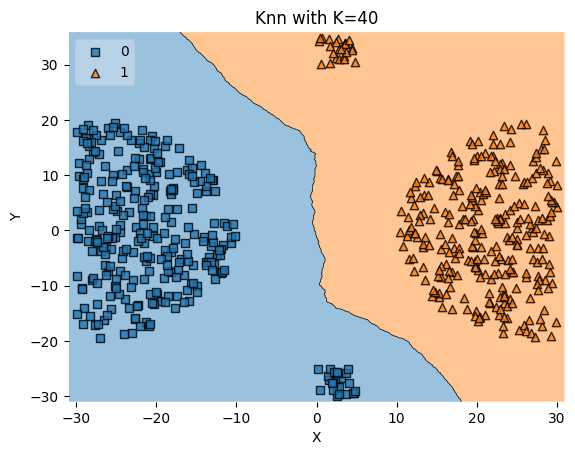

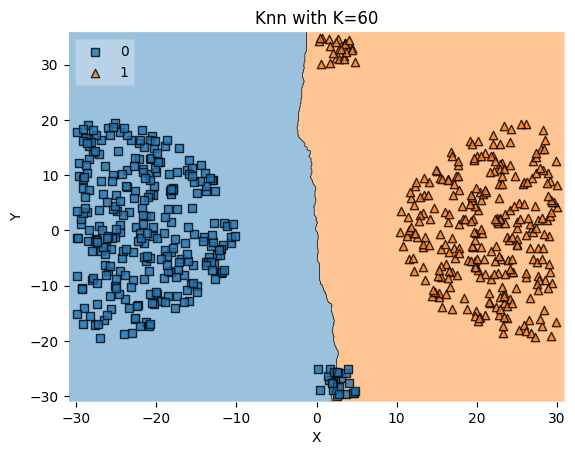

In [ ]:
# Data con outliers
url='https://raw.githubusercontent.com/Geerdata/DS/main/Datacoder/Arc.%20Modelo/outlier.csv'
data5 = pd.read_csv(url,sep=',')
data5.head()

for i in [1, 5,20,30,40,60]:
    knn_comparison(data5, i)

# **Regresion logistica**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X, y = load_breast_cancer(return_X_y=True)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# Separacion train/tet
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=10000, n_jobs=-1)
# Ajustar modelo
model.fit(X_train, y_train)
#Predicciones
predicciones = model.predict(X_test)
predicciones

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
print(accuracy_score(y_test, predicciones))

0.972027972027972


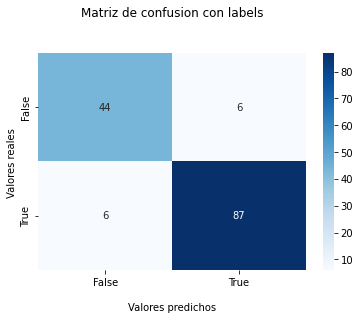

In [ ]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()